In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Loading the dataset
fertilizer = pd.read_csv('dataset/Fertilizer Prediction.csv')

In [3]:
# Display dataset info
fertilizer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [4]:
# Checking missing values
fertilizer.isnull().sum()


Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [5]:
# Checking duplicate values
fertilizer.duplicated().sum()


np.int64(0)

In [6]:
# Display dataset statistics
fertilizer.describe()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [7]:
# Display first few rows
fertilizer.head()


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [8]:
# Checking target variable distribution
fertilizer['Fertilizer Name'].value_counts()


Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

In [9]:
# Encoding categorical variables
fertilizer['Soil Type'] = fertilizer['Soil Type'].astype('category').cat.codes
fertilizer['Crop Type'] = fertilizer['Crop Type'].astype('category').cat.codes
fertilizer['Fertilizer Name'] = fertilizer['Fertilizer Name'].astype('category').cat.codes


In [10]:
# Extracting feature names
features = fertilizer.columns.to_list()
features.remove('Fertilizer Name')


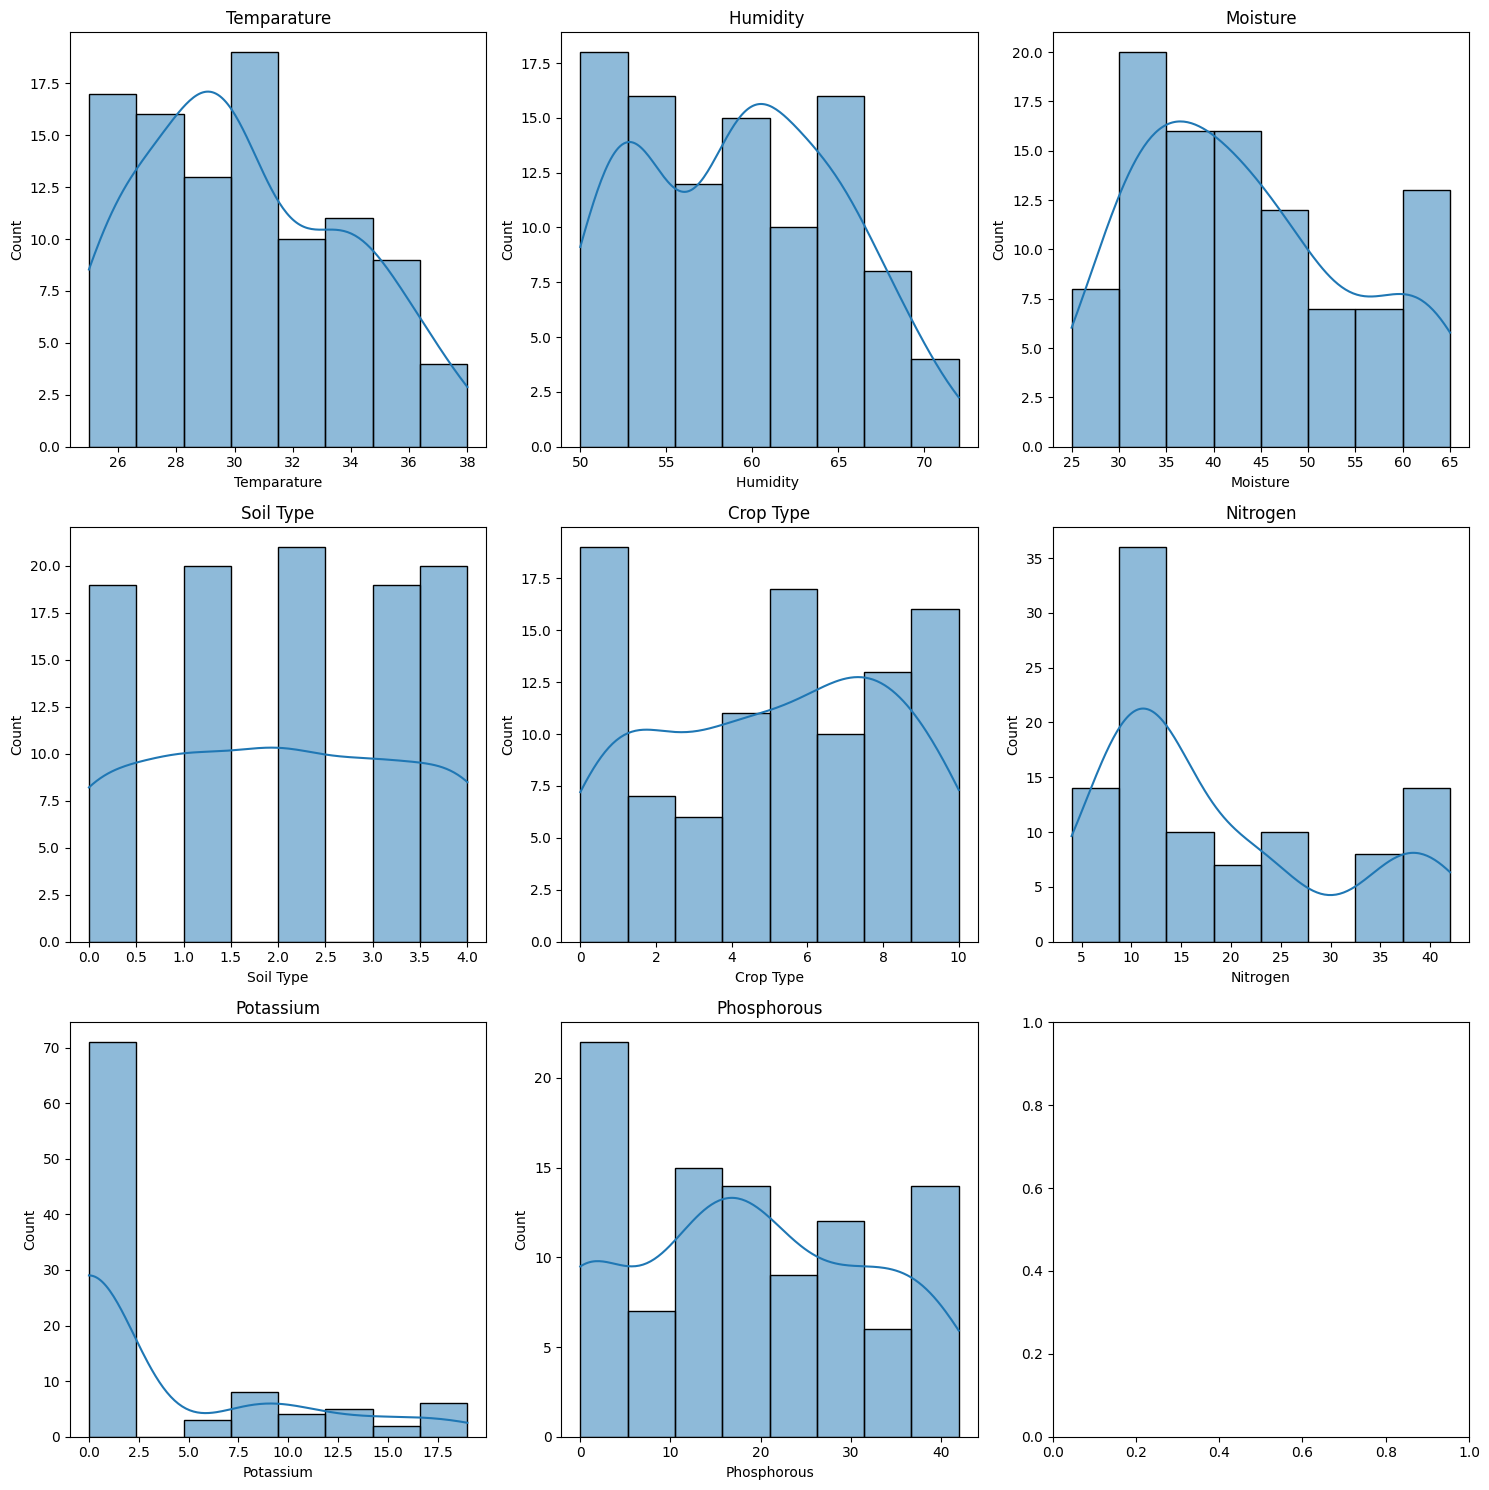

In [11]:
# Plotting feature distributions
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(fertilizer[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()


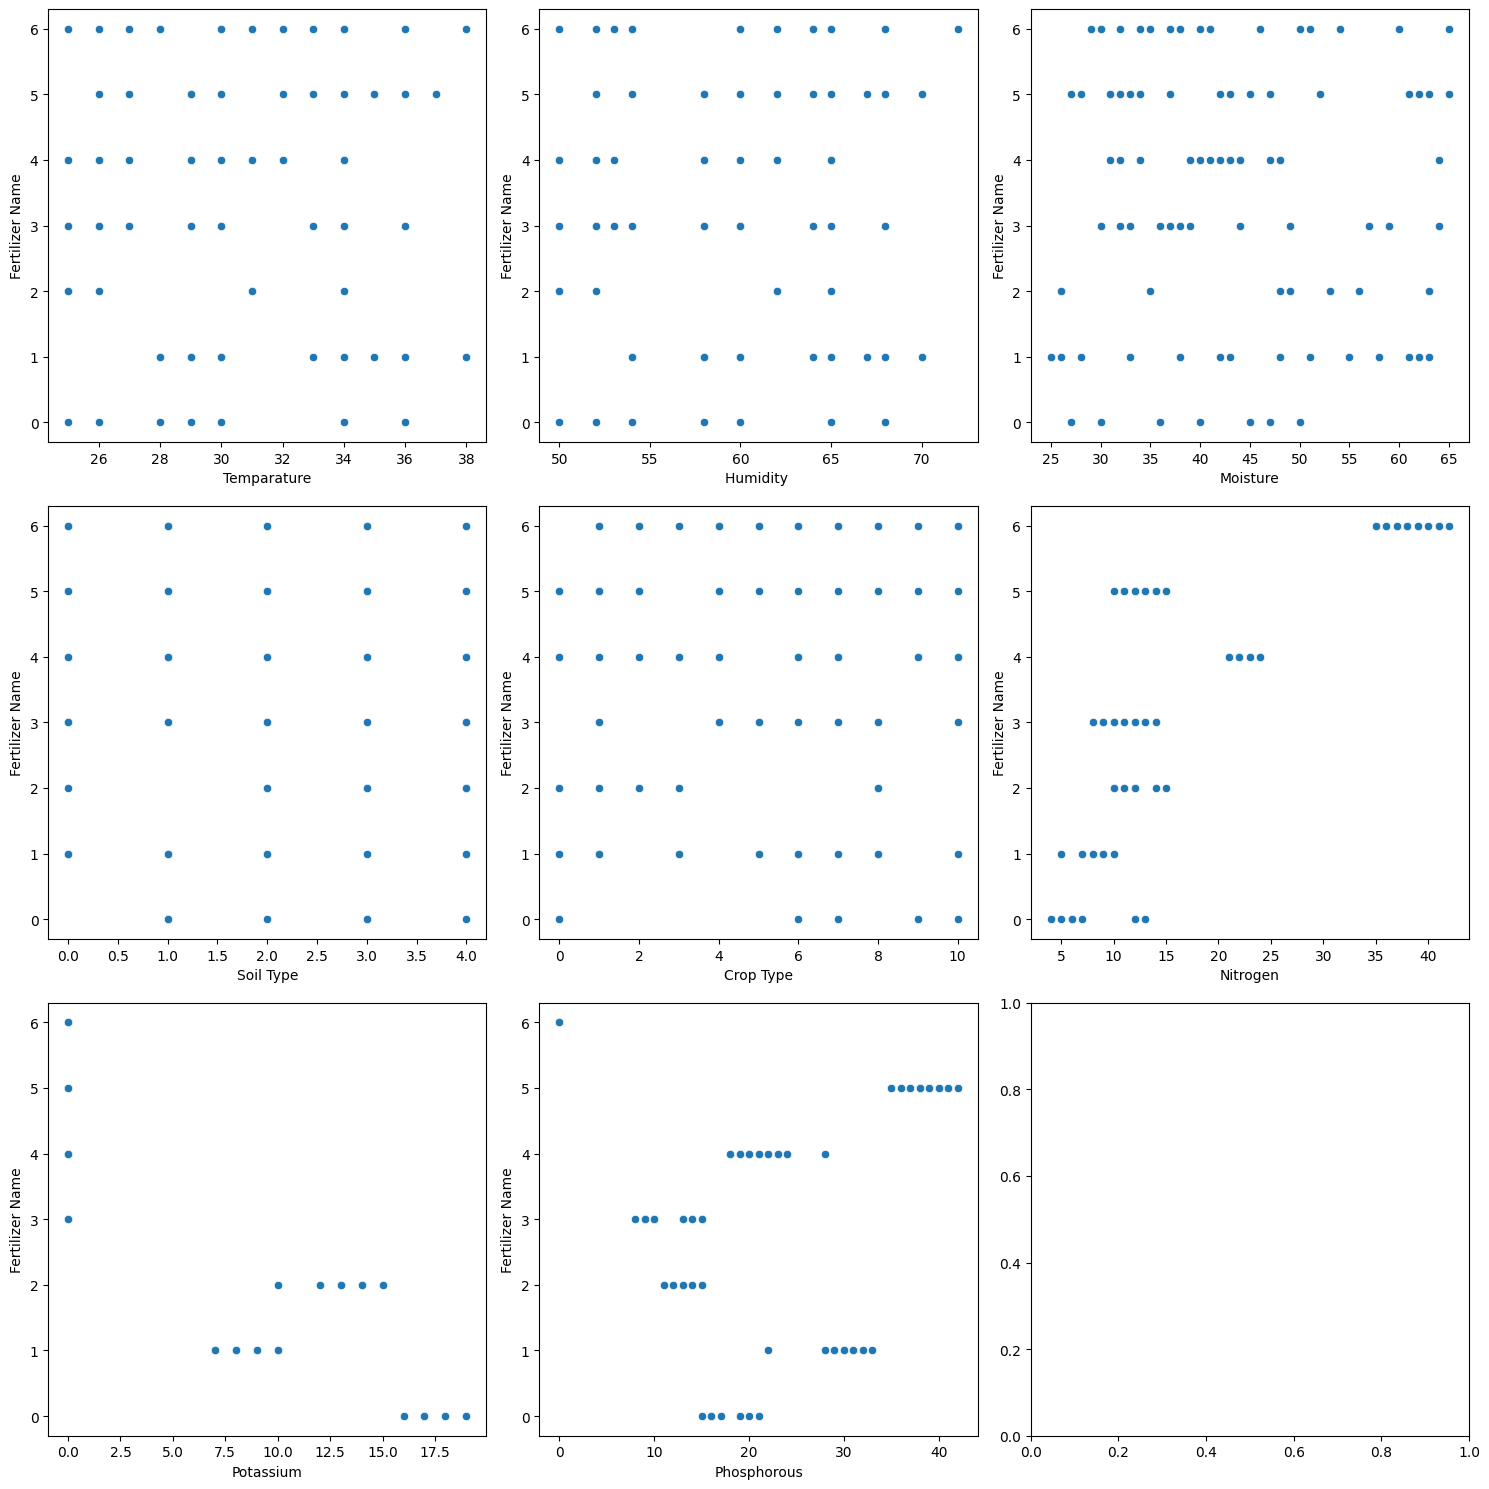

In [12]:
# Scatter plots for feature vs. target
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='Fertilizer Name', data=fertilizer, ax=subplot)
plt.tight_layout()
plt.show()


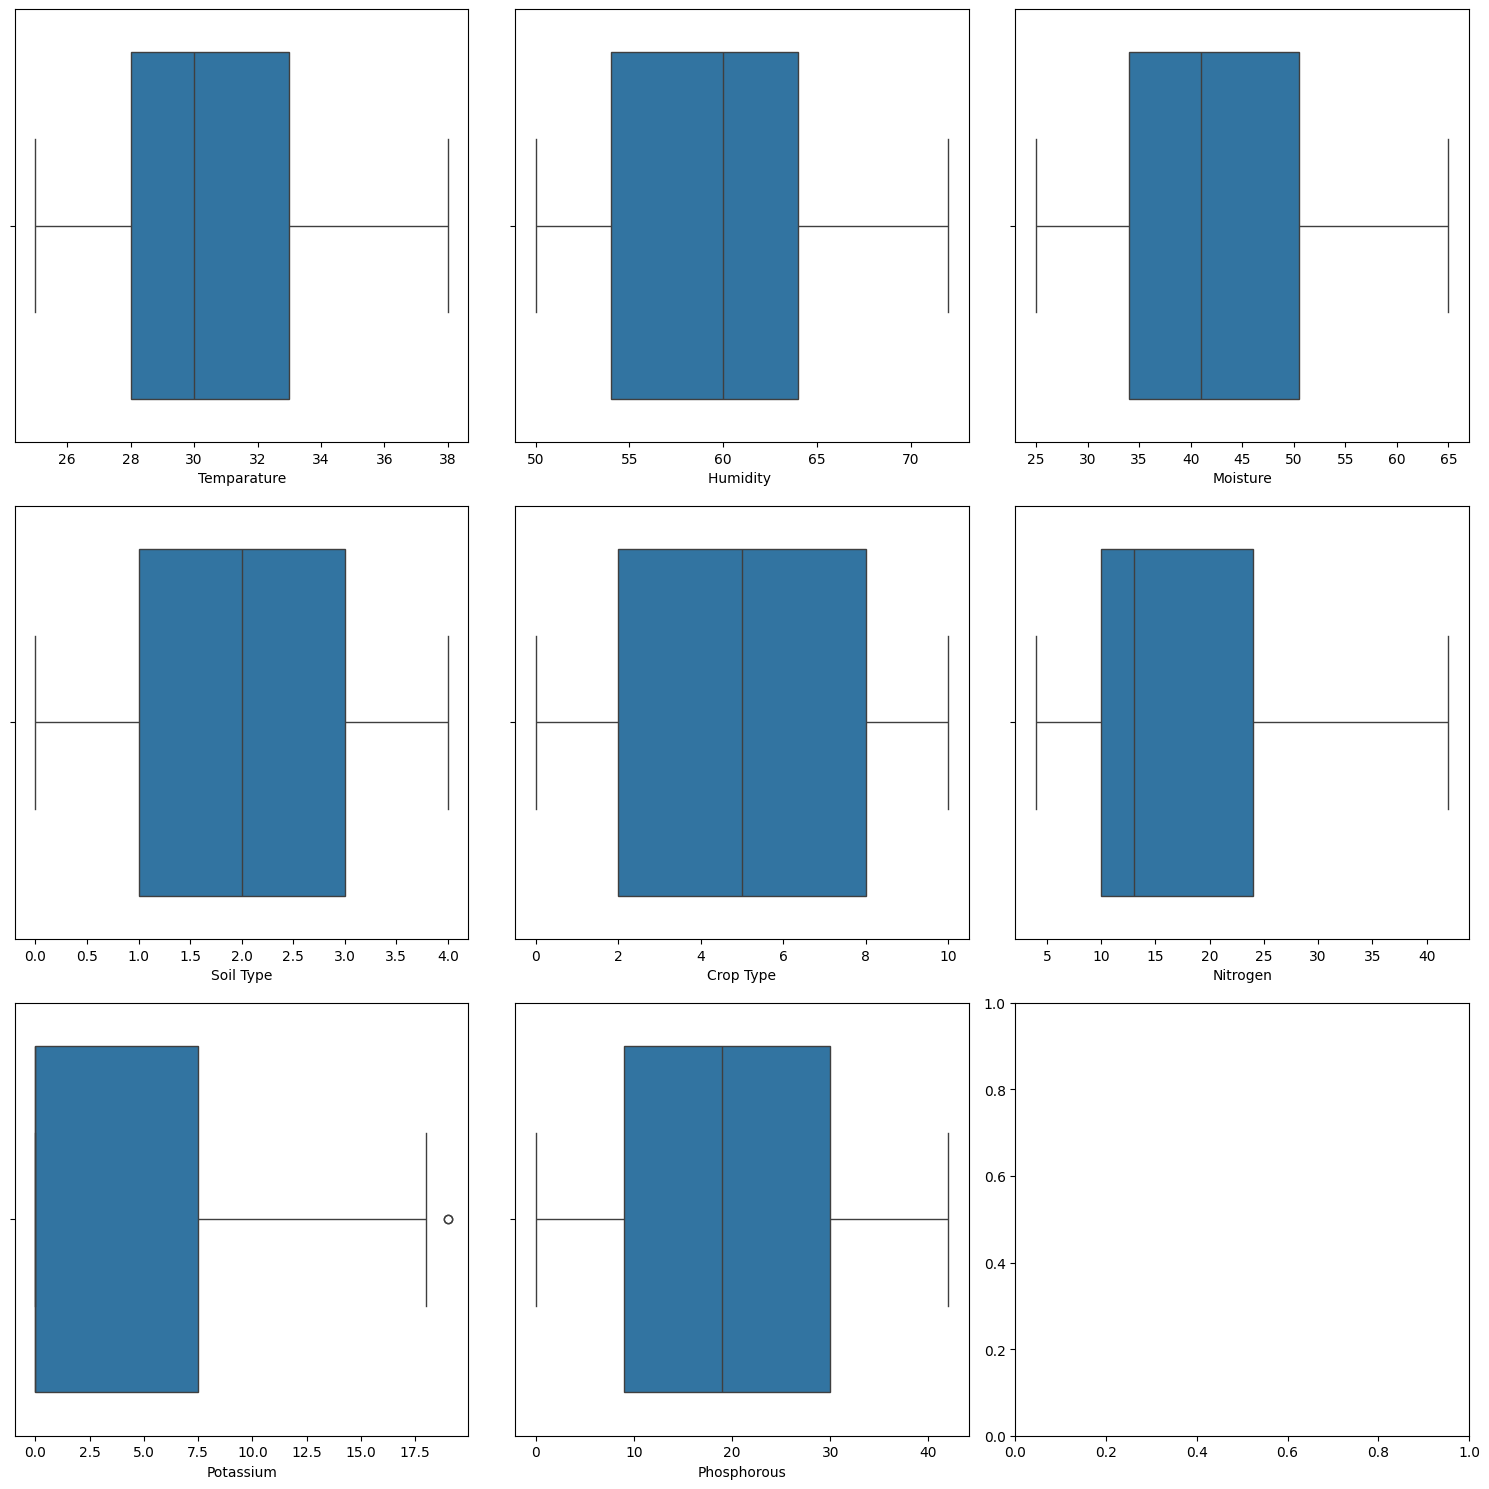

In [13]:
# Boxplots for outlier detection
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(x=fertilizer[i], ax=subplot)
plt.tight_layout()
plt.show()


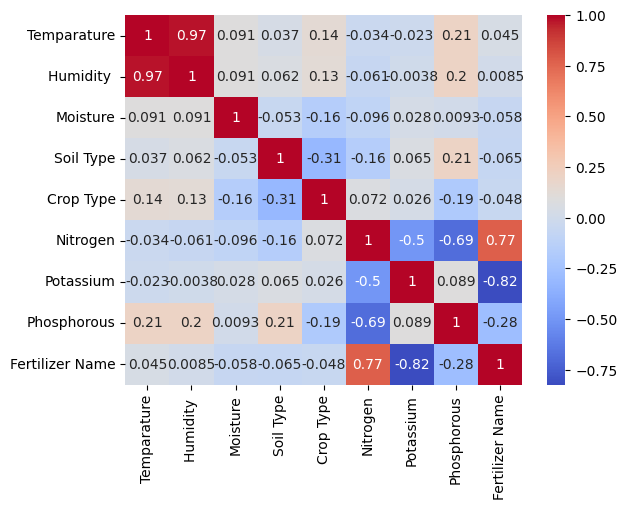

In [14]:
# Correlation heatmap
corr = fertilizer.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [15]:
# Splitting features and target
x = fertilizer.drop('Fertilizer Name', axis=1)
y = fertilizer['Fertilizer Name']


In [16]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
# Standardizing data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [18]:
# Training Decision Tree Classifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)


DecisionTreeClassifier()

In [19]:
# Model evaluation
y_pred = DT.predict(x_test)
print(f'Accuracy Score on Test Data: {accuracy_score(y_test, y_pred)}')


Accuracy Score on Test Data: 1.0


In [20]:
# Prediction function
def fertilizer_recommend(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
    features = np.array([[Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
    transformed_features = sc.transform(features)
    prediction = DT.predict(transformed_features)[0]
    fertilizer_dict = {i: cat for i, cat in enumerate(fertilizer['Fertilizer Name'].astype('category').cat.categories)}
    return f'The recommended fertilizer is: {fertilizer_dict[prediction]}'


In [21]:
# Example prediction
fertilizer_recommend(30, 60, 40, 2, 3, 20, 10, 15)


C:\Users\pushp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'The recommended fertilizer is: 4'

In [22]:
# Display classification report
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



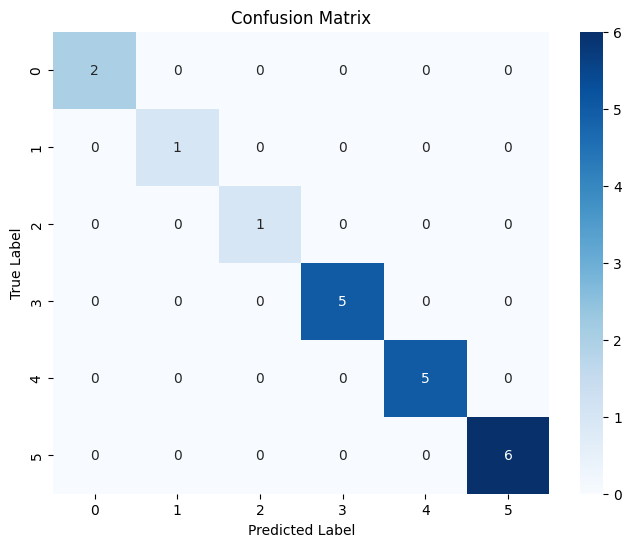

In [23]:
# Display confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


C:\Users\pushp\AppData\Local\Temp\ipykernel_10872\445662347.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=importances, palette='viridis')


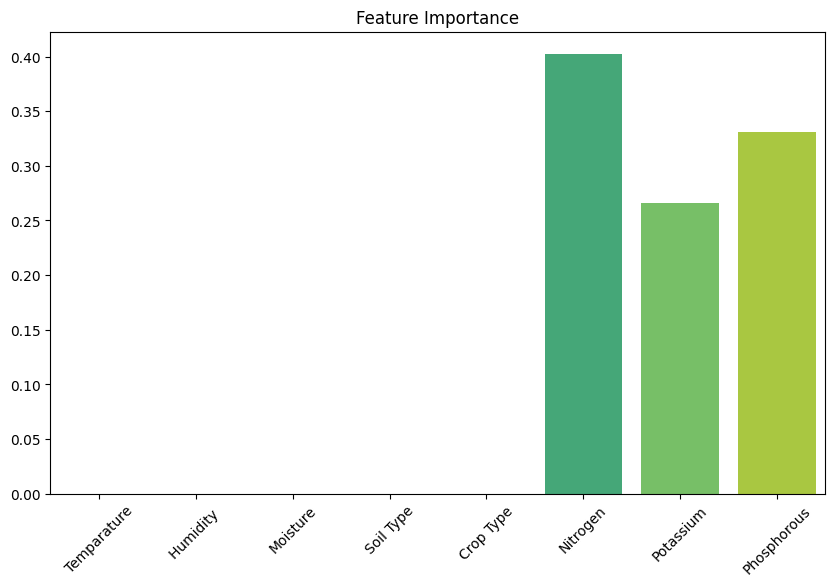

In [24]:
# Feature importance visualization
importances = DT.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=importances, palette='viridis')
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.show()


In [25]:
# Save the trained model
import joblib
joblib.dump(DT, 'fertilizer_model.pkl')
joblib.dump(sc, 'scaler.pkl')
print('Model and Scaler saved successfully!')


Model and Scaler saved successfully!


In [26]:
# Load the saved model and scaler
loaded_model = joblib.load('fertilizer_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')
print('Model and Scaler loaded successfully!')


Model and Scaler loaded successfully!


In [27]:
# Prediction function using the loaded model
def fertilizer_recommend(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
    features = np.array([[Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
    transformed_features = loaded_scaler.transform(features)
    prediction = loaded_model.predict(transformed_features)[0]
    fertilizer_dict = {i: cat for i, cat in enumerate(fertilizer['Fertilizer Name'].astype('category').cat.categories)}
    return f'The recommended fertilizer is: {fertilizer_dict[prediction]}'


In [28]:
# Example prediction
fertilizer_recommend(30, 60, 40, 2, 3, 20, 10, 15)


C:\Users\pushp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'The recommended fertilizer is: 4'